In [27]:
%matplotlib inline

import math
import numpy as np
import numpy.linalg as la
from importlib import reload
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import beta, norm, gamma, kstest, alpha, t, recipinvgauss, ncf, ksone, johnsonsu, maxwell
import pandas as pd
a4_dims = (11.7, 8.27)

In [28]:
x = np.array([1,0,0])
la.norm(x)

1.0

In [76]:
import src.analysis.utils as ana_utils
reload(ana_utils)

<module 'src.analysis.utils' from '/home/garro/Projects/masterarbeit/src/analysis/utils.py'>

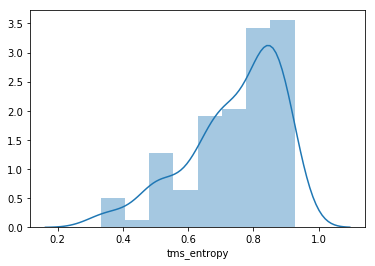

In [77]:
data=ana_utils.tms_entropy('experiments.db', satisfies=lambda _, h, c: c and h>0.1)
sns.distplot(data['tms_entropy'])

91


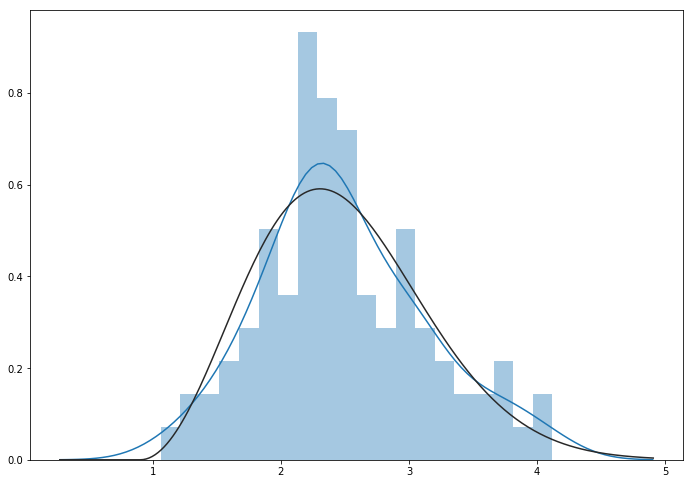

In [7]:
xs = ana_utils.get_entropy_avg(
    '/media/sf_VBoxshare/Experimente/output/dynamic_2/gsat_296_320.db',
    3,
    'mutual_information'
)
print(len(xs))
fig, ax = plt.subplots(figsize=a4_dims)
sns.distplot(xs, ax=ax, fit=maxwell, bins=20)

In [8]:
dist = maxwell

rejected, total = 0, 0
for i in range(1,11):
    xs = ana_utils.get_entropy_avg(
        '/media/sf_VBoxshare/Experimente/output/dynamic_2/gsat_296_320.db',
        i,
        'mutual_information'
    )
    theta = dist.fit(xs)
    d, p = kstest(xs, lambda x: dist.cdf(x, *theta))
    total += 1
    if d >= 1.358/math.sqrt(len(xs)):
        rejected += 1
        
    print(f'd={d} p={p} reject={1.358/math.sqrt(len(xs))}')
        
print(f'{i}: {rejected}/{total}')  

d=0.9988073826049623 p=0.0 reject=0.14006700524194415
d=0.9894196815767801 p=0.0 reject=0.14314576875028864
d=0.9989009306647704 p=0.0 reject=0.1423570808268365
d=0.9965482604251971 p=0.0 reject=0.1439477121048637
d=0.9931973852428255 p=0.0 reject=0.1415812871447538
d=0.9975713744935409 p=0.0 reject=0.14006700524194415
d=0.9925972215036111 p=0.0 reject=0.1415812871447538
d=0.9942109544476697 p=0.0 reject=0.14314576875028864
d=0.9923812850620067 p=0.0 reject=0.14006700524194415
d=0.9914864418576362 p=0.0 reject=0.1415812871447538
10: 10/10


In [ ]:
xs = ana_utils.get_state_entropy_points('/media/sf_VBoxshare/Experimente/output/static_2/probsat.db',4)
df = pd.DataFrame.from_dict(xs)
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(x='hamming_dist', y='entropy_avg', data=df, ax=ax)

In [ ]:
for i in range(1,11):
    s_entropy_distr = ana_utils.get_state_entropy_distr('/media/sf_VBoxshare/Experimente/output/static_2/walksat.db',i)
    rejected, total = 0, 0
    for hamming_dist, data in s_entropy_distr.items():
        theta = norm.fit(data)
        d, p = kstest(data, lambda x: norm.cdf(x, *theta))
        total += 1
        if d >= 1.358/math.sqrt(100):
            rejected += 1
        
    # print(f'd={d} p={p} reject={d >= 1.358/math.sqrt(100)}')
        
    print(f'{i}: {rejected}/{total}')

In [ ]:
xs = ana_utils.read_improvement_probs('/media/sf_VBoxshare/Experimente/output/static_2/gsat.db', 1)
distr = np.array([p for _, p in xs])
# print(distr)
d = ana_utils.approximate_stationary_distr(distr[0], eps=2**(-10))

In [ ]:
xs = ana_utils.get_tms_entropy(
    '/media/sf_VBoxshare/Experimente/output/static_2/walksat.db', 2,
    eps=2**(-17), max_loops=20000
)

In [ ]:
all_data = []
for _, h, c in xs:
    if c and h > 0.05:
        all_data.append(h)
print(len(all_data))

In [ ]:
fig, ax = plt.subplots(figsize=a4_dims)
sns.distplot(all_data, bins=20, norm_hist=True, fit=beta)
#xs = np.arange(0.0,1,0.0001)
#theta_beta = beta.fit(plot_data)
#ax.plot(xs, beta.pdf(xs, *theta_beta)) #3.28, 1.714, loc=0.9652, scale=0.0276))

In [ ]:
theta_beta = beta.fit(all_data)
theta_norm = norm.fit(all_data)
theta_gamma = gamma.fit(all_data)

In [ ]:
theta_beta, theta_norm, theta_gamma

In [ ]:
ana_utils.log_likelihood(all_data, lambda x: beta.pdf(x,*theta_beta))

In [ ]:
ana_utils.log_likelihood(all_data, lambda x: norm.pdf(x,*theta_norm))

In [ ]:
ana_utils.log_likelihood(all_data, lambda x: gamma.pdf(x,*theta_gamma))

In [ ]:
kstest(all_data, lambda x: beta.cdf(x, *theta_beta))

In [ ]:
distr = beta

for i in range(1,11):
    xs = ana_utils.get_tms_entropy(
        '/media/sf_VBoxshare/Experimente/output/static_2/gsat.db', i,
        eps=2**(-10), max_loops=20000
    )
                                  
    all_data = []
    for _, h, conv in xs:
        if conv and h > 0.01:
            all_data.append(h)
        
    theta = distr.fit(all_data)
    res = kstest(all_data, lambda x: distr.cdf(x,*theta))
    print(res.statistic)
    print('Convergent: ', len(all_data))
    if res.statistic >= 0.1358:
        print('Fail')
    else:
        print('Passed')
    